In [32]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1.2)



from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, jaccard_score, hamming_loss, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils.multiclass import unique_labels

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterSampler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, make_union
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# CLASSIFIERS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#REGRESSORS
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor


from scipy.spatial.distance import cdist, pdist
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn import (manifold, decomposition, ensemble,
                     discriminant_analysis, random_projection)

import statistics
#plt.style.use('seaborn')

import numpy as np
import tensorflow as tf


import warnings
warnings.filterwarnings('ignore')


import utilities
%matplotlib inline


SEED = 3
import os
import random as rn

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

name_prefix = 'wild'


In [33]:
# Data preparation
def data_preparation():
    
    MXene = MXene.strip()
    MXene = MXene.replace(' ', '')
    elements = MXene.split('2', 1)
    M = elements[0]
    X = elements[1][0]
    T = elements[1][1:]
    print(M, X, T)

In [34]:
# Evaluation
def multi_output_score(test, pred):
    true = 0
    for i in range(len(test)):
        if test[i]==pred[i]:
            true = true + 1
    return true/len(test)

In [4]:
# load data from csv file
def load_data(filename='data.csv'):
    X_df = pd.read_csv(filename)
    X_df = X_df.fillna(0)
    return X_df

In [5]:
def evaluation(true, pred):
    index_abs = 0
    jaccard_score_list = []
    hamming_score_list = []
    f1_score_list = []
    precision_score_list = []
    recall_score_list = []
    pred = pred.tolist()
    for row in true:
        single_score = jaccard_score(row, pred[index_abs], average='micro')
        hammung_score = hamming_loss(row, pred[index_abs])
        recall = recall_score(row, pred[index_abs], average='micro')
        precision = precision_score(row, pred[index_abs], average='micro')
        f1 = f1_score(row, pred[index_abs], average='micro')
        jaccard_score_list.append(single_score)
        hamming_score_list.append(hammung_score)
        precision_score_list.append(precision)
        recall_score_list.append(recall)
        f1_score_list.append(f1)
        index_abs = index_abs + 1
    return jaccard_score_list, hamming_score_list, f1_score_list, precision_score_list, recall_score_list


## Load data and preprocess

In [6]:
import pandas as pd

X_df = load_data('Gold_dataset/Au_nanoparticle_dataset.csv')
X_df.describe()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4.000000e+03,4000.000000,4000.000000,...,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.000000,4000.000000
mean,2000.500000,615.000000,0.000055,8.200000,3476.786500,2521.550250,955.23625,5.885368e-26,16.436127,26.028875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12742.661846,851.243153
std,1154.844867,223.625808,0.000081,2.856929,3679.286769,2976.232459,721.87022,6.227819e-26,6.761951,9.822659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13690.999369,771.395830
min,1.000000,273.000000,0.000000,1.000000,236.000000,89.000000,137.00000,4.000000e-27,0.519100,9.665200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-53772.854000,0.000000
25%,1000.750000,410.500000,0.000000,7.000000,1061.000000,618.750000,437.00000,1.800000e-26,11.898975,18.570825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16504.678000,334.640675
50%,2000.500000,598.000000,0.000000,10.000000,1867.000000,1199.000000,666.00000,3.160000e-26,14.914300,22.978850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6754.782950,553.118000
75%,3000.250000,785.500000,0.000100,10.000000,4503.000000,3183.000000,1301.75000,7.620000e-26,19.352375,34.207525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3786.450450,1107.184500
max,4000.000000,973.000000,0.000250,10.000000,14277.000000,11580.000000,3190.00000,2.420000e-25,35.136500,66.289500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-783.428590,4470.351000


In [7]:
# TODO: 5 cases 
feature_set_surface = ['N_surface', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_surf', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_total = ['N_total', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'Avg_total', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15']
feature_set_condensed = ['N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_bulk', 'Avg_total', 'Avg_surf', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA','q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15',  'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_expanded = ['N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1', 'Curve_2', 'Curve_3', 'Curve_4', 'Curve_5', 'Curve_6','Curve_7', 'Curve_8', 'Curve_9', 'Curve_10', 'Curve_11','Curve_12', 'Curve_13', 'Curve_14', 'Curve_15', 'Curve_16','Curve_17', 'Curve_18', 'Curve_19', 'Curve_20', 'Curve_21', 'Curve_22', 'Curve_23', 'Curve_24', 'Curve_25', 'Curve_26', 'Curve_27', 'Curve_28', 'Curve_29', 'Curve_30', 'Curve_31', 'Curve_32', 'Curve_33', 'Curve_34', 'Curve_35', 'Curve_36', 'Curve_37', 'Curve_38', 'Curve_39', 'Curve_40', 'Curve_41', 'Curve_42', 'Curve_43', 'Curve_44', 'Curve_45', 'Curve_46', 'Curve_47', 'Curve_48', 'Curve_49', 'Curve_50', 'Curve_51', 'Curve_52', 'Curve_53', 'Curve_54', 'Curve_55', 'Curve_56', 'Curve_57', 'Curve_58', 'Curve_59', 'Curve_60', 'Curve_61', 'Curve_62', 'Curve_63', 'Curve_64', 'Curve_65', 'Curve_66', 'Curve_67', 'Curve_68', 'Curve_69', 'Curve_70', 'Curve_71', 'Curve_72', 'Curve_73', 'Curve_74', 'Curve_75', 'Curve_76', 'Curve_77', 'Curve_78', 'Curve_79', 'Curve_80', 'Avg_bulk', 'Avg_total', 'Avg_surf', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'SCNO_0', 'SCNO_1', 'SCNO_2', 'SCNO_3', 'SCNO_4', 'SCNO_5', 'SCNO_6', 'SCNO_7', 'SCNO_8', 'SCNO_9', 'SCNO_10', 'SCNO_11', 'SCNO_12', 'SCNO_13', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA','q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15',  'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_bulk = ['N_bulk', 'Avg_bulk', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15']


In [8]:
name_prefix = 'MPL'


X_features = X_df[feature_set_total] 
feature_names = X_features.columns.values

y_multilabel = X_df.iloc[:,-1:] 
label_names = y_multilabel.columns.values

In [9]:
print('Feature names: \n', feature_names)
print('Label names: ', label_names)

Feature names: 
 ['N_total' 'Volume' 'R_min' 'R_max' 'R_diff' 'R_avg' 'R_std' 'R_skew'
 'R_kurt' 'Avg_total' 'TCN_1' 'TCN_2' 'TCN_3' 'TCN_4' 'TCN_5' 'TCN_6'
 'TCN_7' 'TCN_8' 'TCN_9' 'TCN_10' 'TCN_11' 'TCN_12' 'TCN_13' 'TCN_14'
 'TCN_15' 'TCN_16' 'TCN_17' 'Avg_bonds' 'Std_bonds' 'Max_bonds'
 'Min_bonds' 'N_bonds' 'angle_avg' 'angle_std' 'q6q6_avg_total'
 'q6q6_avg_bulk' 'q6q6_avg_surf' 'q6q6_T0' 'q6q6_T1' 'q6q6_T2' 'q6q6_T3'
 'q6q6_T4' 'q6q6_T5' 'q6q6_T6' 'q6q6_T7' 'q6q6_T8' 'q6q6_T9' 'q6q6_T10'
 'q6q6_T11' 'q6q6_T12' 'q6q6_T13' 'q6q6_T14' 'q6q6_T15']
Label names:  ['Formation_E']


<Figure size 360x360 with 0 Axes>

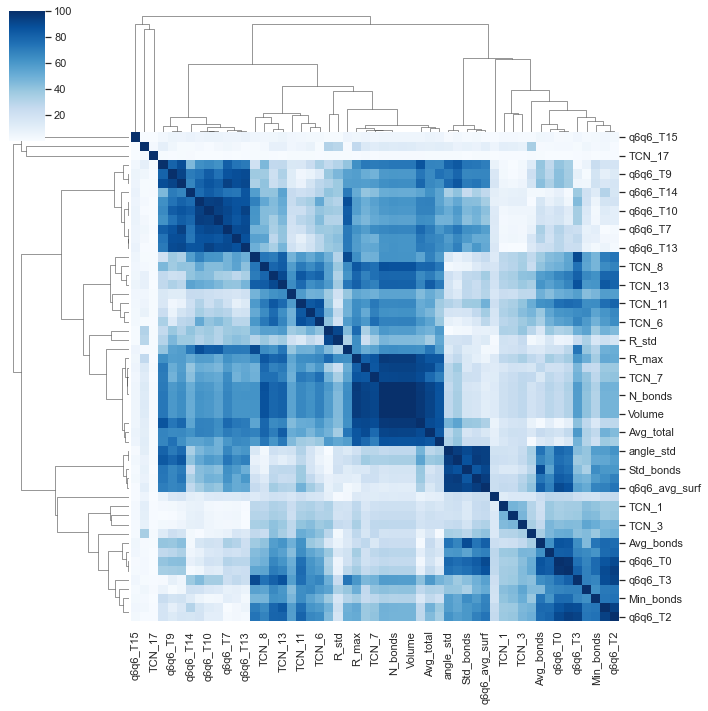

,N_total,Volume,R_min,R_max,R_diff,R_avg,R_std,R_skew,R_kurt,Avg_total,...,q6q6_T6,q6q6_T7,q6q6_T8,q6q6_T9,q6q6_T10,q6q6_T11,q6q6_T12,q6q6_T13,q6q6_T14,q6q6_T15
N_total,100.000000,99.999782,93.226462,95.031828,57.880156,99.918684,44.691724,12.905259,19.286429,92.229757,...,61.242248,66.983759,61.259139,59.409688,59.680266,55.098726,64.048110,61.224657,50.843338,4.794889
Volume,99.999782,100.000000,93.227782,95.029725,57.876828,99.918655,44.689611,12.894855,19.282211,92.232766,...,61.243552,66.985042,61.265121,59.415253,59.682138,55.098980,64.050732,61.226976,50.845418,4.796087
R_min,93.226462,93.227782,100.000000,81.814579,33.818301,92.500087,21.560349,14.230213,16.778495,89.699752,...,50.318882,57.532929,50.377196,50.588545,48.574230,45.717176,57.220636,52.391514,39.544026,5.126039
R_max,95.031828,95.029725,81.814579,100.000000,77.571181,95.793133,63.870489,26.302984,27.293819,85.352457,...,57.541970,62.461869,58.456980,57.164446,57.124453,51.139798,58.141200,57.853107,51.195543,3.957998
R_diff,57.880156,57.876828,33.818301,77.571181,100.000000,59.735236,91.103969,31.497611,28.549979,48.371391,...,34.388870,37.427468,38.851963,38.442862,37.135887,31.194775,31.637018,37.519036,40.341439,1.022160
R_avg,99.918684,99.918655,92.500087,95.793133,59.735236,100.000000,46.625072,13.609604,19.007706,91.804580,...,60.515727,66.120038,60.957626,59.175266,59.155240,54.287714,63.271401,60.795589,50.714991,4.771727
R_std,44.691724,44.689611,21.560349,63.870489,91.103969,46.625072,100.000000,29.173046,2.596171,35.942642,...,30.735355,39.184488,42.346252,45.787402,35.905171,30.485046,37.707629,40.209978,37.793894,0.896666
R_skew,12.905259,12.894855,14.230213,26.302984,31.497611,13.609604,29.173046,100.000000,34.486921,10.390975,...,2.275120,4.053908,3.126150,4.123587,0.419429,3.119921,1.138232,0.651260,1.075785,0.010491
R_kurt,19.286429,19.282211,16.778495,27.293819,28.549979,19.007706,2.596171,34.486921,100.000000,15.249794,...,0.522738,7.543112,16.273923,21.652151,4.936646,5.650849,18.141310,13.734638,2.542741,1.746024
Avg_total,92.229757,92.232766,89.699752,85.352457,48.371391,91.804580,35.942642,10.390975,15.249794,100.000000,...,68.969283,70.853134,67.808329,65.249097,68.004971,62.895576,65.746429,70.092389,62.433189,6.065658


In [10]:
import matplotlib.pyplot as plt

# Correlation Coefficient Filter

sns.set()
correlated = X_features.corr(method='spearman').abs().mul(100).astype(float)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation')
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('./Gold/total/correlation_matrix_{}.png'.format(name_prefix), dpi=300, bbox_inches='tight')
plt.show()
correlated




In [11]:
# print correlated features
for c1 in feature_names:
  for c2 in feature_names:
    if c1 != c2 and correlated[c1][c2] > 95:
        print(c1, c2)

N_total Volume
N_total R_max
N_total R_avg
N_total TCN_12
N_total N_bonds
Volume N_total
Volume R_max
Volume R_avg
Volume TCN_12
Volume N_bonds
R_max N_total
R_max Volume
R_max R_avg
R_avg N_total
R_avg Volume
R_avg R_max
R_avg TCN_12
R_avg N_bonds
TCN_12 N_total
TCN_12 Volume
TCN_12 R_avg
TCN_12 N_bonds
N_bonds N_total
N_bonds Volume
N_bonds R_avg
N_bonds TCN_12
q6q6_avg_total q6q6_avg_bulk
q6q6_avg_bulk q6q6_avg_total
q6q6_T0 q6q6_T1
q6q6_T1 q6q6_T0


In [17]:
# data processing

from sklearn import preprocessing

X_scaled = preprocessing.StandardScaler().fit_transform(X_features)
y_scaled = preprocessing.StandardScaler().fit_transform(y_multilabel)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [37]:
# Build base model

base_model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(32, activation='relu'), 
    
    tf.keras.layers.Dense(16), 

    tf.keras.layers.Dense(units=1)
])

base_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = base_model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

base_model.summary()

tf.keras.models.save_model(base_model, './Gold/base_model_{}_no_scaling.h5'.format(name_prefix))

print("Model saved!")

Epoch 1/200
320/320 [==============================] - 1s 1ms/step - loss: 0.2281 - mae: 0.2485 - val_loss: 0.0524 - val_mae: 0.1555
Epoch 2/200
320/320 [==============================] - 0s 777us/step - loss: 0.0404 - mae: 0.1297 - val_loss: 0.0337 - val_mae: 0.1185
Epoch 3/200
320/320 [==============================] - 0s 794us/step - loss: 0.0277 - mae: 0.1101 - val_loss: 0.0254 - val_mae: 0.1008
Epoch 4/200
320/320 [==============================] - 0s 797us/step - loss: 0.0224 - mae: 0.0969 - val_loss: 0.0218 - val_mae: 0.0969
Epoch 5/200
320/320 [==============================] - 0s 778us/step - loss: 0.0184 - mae: 0.0892 - val_loss: 0.0212 - val_mae: 0.0975
Epoch 6/200
320/320 [==============================] - 0s 731us/step - loss: 0.0163 - mae: 0.0836 - val_loss: 0.0164 - val_mae: 0.0826
Epoch 7/200
320/320 [==============================] - 0s 792us/step - loss: 0.0167 - mae: 0.0824 - val_loss: 0.0155 - val_mae: 0.0805
Epoch 8/200
320/320 [==============================] - 0s

320/320 [==============================] - 0s 760us/step - loss: 0.0045 - mae: 0.0422 - val_loss: 0.0058 - val_mae: 0.0503
Epoch 62/200
320/320 [==============================] - 0s 771us/step - loss: 0.0041 - mae: 0.0404 - val_loss: 0.0046 - val_mae: 0.0444
Epoch 63/200
320/320 [==============================] - 0s 742us/step - loss: 0.0053 - mae: 0.0439 - val_loss: 0.0070 - val_mae: 0.0605
Epoch 64/200
320/320 [==============================] - 0s 726us/step - loss: 0.0049 - mae: 0.0422 - val_loss: 0.0071 - val_mae: 0.0537
Epoch 65/200
320/320 [==============================] - 0s 730us/step - loss: 0.0038 - mae: 0.0391 - val_loss: 0.0045 - val_mae: 0.0446
Epoch 66/200
320/320 [==============================] - 0s 731us/step - loss: 0.0038 - mae: 0.0384 - val_loss: 0.0057 - val_mae: 0.0492
Epoch 67/200
320/320 [==============================] - 0s 743us/step - loss: 0.0041 - mae: 0.0412 - val_loss: 0.0039 - val_mae: 0.0384
Epoch 68/200
320/320 [==============================] - 0s 74

320/320 [==============================] - 0s 735us/step - loss: 0.0035 - mae: 0.0358 - val_loss: 0.0044 - val_mae: 0.0432
Epoch 122/200
320/320 [==============================] - 0s 722us/step - loss: 0.0027 - mae: 0.0320 - val_loss: 0.0031 - val_mae: 0.0346
Epoch 123/200
320/320 [==============================] - 0s 732us/step - loss: 0.0026 - mae: 0.0314 - val_loss: 0.0049 - val_mae: 0.0438
Epoch 124/200
320/320 [==============================] - 0s 723us/step - loss: 0.0027 - mae: 0.0323 - val_loss: 0.0036 - val_mae: 0.0354
Epoch 125/200
320/320 [==============================] - 0s 724us/step - loss: 0.0030 - mae: 0.0326 - val_loss: 0.0031 - val_mae: 0.0339
Epoch 126/200
320/320 [==============================] - 0s 718us/step - loss: 0.0029 - mae: 0.0334 - val_loss: 0.0039 - val_mae: 0.0381
Epoch 127/200
320/320 [==============================] - 0s 724us/step - loss: 0.0029 - mae: 0.0329 - val_loss: 0.0034 - val_mae: 0.0354
Epoch 128/200
320/320 [==============================] 

Epoch 181/200
320/320 [==============================] - 0s 728us/step - loss: 0.0025 - mae: 0.0303 - val_loss: 0.0032 - val_mae: 0.0369
Epoch 182/200
320/320 [==============================] - 0s 725us/step - loss: 0.0024 - mae: 0.0300 - val_loss: 0.0031 - val_mae: 0.0328
Epoch 183/200
320/320 [==============================] - 0s 726us/step - loss: 0.0023 - mae: 0.0291 - val_loss: 0.0031 - val_mae: 0.0344
Epoch 184/200
320/320 [==============================] - 0s 719us/step - loss: 0.0024 - mae: 0.0304 - val_loss: 0.0048 - val_mae: 0.0395
Epoch 185/200
320/320 [==============================] - 0s 722us/step - loss: 0.0020 - mae: 0.0279 - val_loss: 0.0030 - val_mae: 0.0349
Epoch 186/200
320/320 [==============================] - 0s 724us/step - loss: 0.0025 - mae: 0.0308 - val_loss: 0.0035 - val_mae: 0.0414
Epoch 187/200
320/320 [==============================] - 0s 727us/step - loss: 0.0024 - mae: 0.0307 - val_loss: 0.0045 - val_mae: 0.0387
Epoch 188/200
320/320 [==================

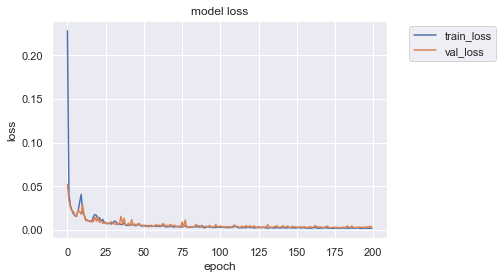

In [38]:
# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/base_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [34]:
import utilities

stop_call_back = utilities.EarlyStoppingByLossVal(monitor='loss', value=0.002, verbose=0)

base_model = tf.keras.models.load_model('./Gold/base_model_{}_no_scaling.h5'.format(name_prefix))

base_model.trainable = False

feature_model = utilities.Feature_Importance_Layer.make_feature_model(base_model, shape=(len(feature_names)))

opt = utilities.tf.keras.optimizers.Adam()

feature_model.compile(loss='mse', optimizer=opt, metrics=['mae'], run_eagerly=True)

history = feature_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True, callbacks=[stop_call_back])


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 53)]              0         
_________________________________________________________________
feature_extractor (Sequentia (None, 53)                53        
_________________________________________________________________
sequential_10 (Sequential)   (10, 1)                   2273      
Total params: 2,326
Trainable params: 53
Non-trainable params: 2,273
_________________________________________________________________
Epoch 1/100
320/320 [==============================] - 3s 9ms/step - loss: 0.8063 - mae: 0.6082 - val_loss: 0.6165 - val_mae: 0.5316
Epoch 2/100
320/320 [==============================] - 3s 9ms/step - loss: 0.4077 - mae: 0.4240 - val_loss: 0.2759 - val_mae: 0.3446
Epoch 3/100
320/320 [==============================] - 3s 9ms/step - loss: 0.1832 - mae: 0.2836 - val_loss: 0.1659 - val

320/320 [==============================] - 2s 8ms/step - loss: 0.0034 - mae: 0.0376 - val_loss: 0.0040 - val_mae: 0.0419
Epoch 57/100
320/320 [==============================] - 2s 8ms/step - loss: 0.0034 - mae: 0.0374 - val_loss: 0.0039 - val_mae: 0.0414
Epoch 58/100
320/320 [==============================] - 2s 8ms/step - loss: 0.0034 - mae: 0.0369 - val_loss: 0.0039 - val_mae: 0.0411
Epoch 59/100
320/320 [==============================] - 3s 10ms/step - loss: 0.0033 - mae: 0.0367 - val_loss: 0.0038 - val_mae: 0.0411
Epoch 60/100
320/320 [==============================] - 3s 10ms/step - loss: 0.0033 - mae: 0.0365 - val_loss: 0.0038 - val_mae: 0.0409
Epoch 61/100
320/320 [==============================] - 3s 9ms/step - loss: 0.0033 - mae: 0.0363 - val_loss: 0.0037 - val_mae: 0.0406
Epoch 62/100
320/320 [==============================] - 3s 9ms/step - loss: 0.0033 - mae: 0.0362 - val_loss: 0.0037 - val_mae: 0.0404
Epoch 63/100
320/320 [==============================] - 3s 10ms/step - lo

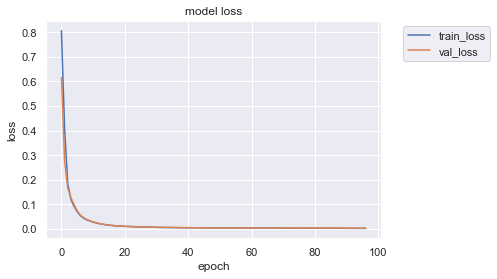

In [35]:
# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/feature_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [35]:
from copy import copy
import numpy as np
from numpy import arange

from scipy.spatial.distance import cdist,pdist
from scipy.stats import levene, pearsonr

from pandas import Series, DataFrame

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D




def plot_feature_importance(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)


    plt.bar(x_val, w_lr_sort)
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def plot_feature_importance_reverse(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)

    plt.bar(x_val, w_lr_sort, color='r')
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def return_feature_importance(ft_set, feature_importance, show_cols = 30):

    w_lr = copy(np.abs(feature_importance))
    w_lr = 100 * (w_lr / w_lr.max())
    sorted_index_pos = [index for index, num in sorted(enumerate(w_lr), key=lambda x: x[-1], 
                   reverse=True)]

    ft_sorted = []
    w_lr_sort = []
    for i, idx in enumerate(sorted_index_pos):
        if i > show_cols:
            break
        ft_sorted.append(ft_set[idx])
        w_lr_sort.append(w_lr[idx])

    return w_lr_sort, ft_sorted, sorted_index_pos





In [36]:
weights = np.load('gold_weights_output_MPL.npy')

In [37]:
weights_std = np.std(weights, axis=0)
weights_std

array([0.02690006, 0.02874058, 0.0320806 , 0.03169031, 0.02053773,
       0.01919752, 0.01993813, 0.03199179, 0.04976899, 0.02656753,
       0.03329019, 0.03323807, 0.04301367, 0.04147576, 0.03122282,
       0.0114659 , 0.02655275, 0.01375975, 0.00887229, 0.02499159,
       0.01232722, 0.02884778, 0.02133065, 0.02057236, 0.03112788,
       0.02370716, 0.46951023, 0.01707904, 0.00815744, 0.10703063,
       0.04580355, 0.03111282, 0.03445554, 0.02230642, 0.0274254 ,
       0.03009465, 0.01853224, 0.03200754, 0.03711883, 0.03293017,
       0.0333736 , 0.04019848, 0.02365258, 0.02681804, 0.06302429,
       0.0242528 , 0.0195333 , 0.01921695, 0.01753117, 0.02940421,
       0.00932049, 0.0313882 , 0.00326692], dtype=float32)

In [38]:
weights_mean = weights.mean(axis=0)
weights_mean

array([1.2639488 , 0.9230578 , 0.9894022 , 0.3081664 , 0.8656796 ,
       0.9883125 , 0.8244262 , 0.7406611 , 0.3638608 , 0.7908132 ,
       1.4898744 , 0.5764889 , 0.964047  , 1.0839196 , 1.1562977 ,
       0.8826544 , 1.0996909 , 0.9720566 , 0.8340501 , 0.8472634 ,
       0.9179989 , 1.3304249 , 0.97350484, 0.73118013, 0.58991575,
       0.35684395, 0.7580555 , 0.926249  , 1.0957294 , 0.34443423,
       1.0934273 , 0.717937  , 0.7955397 , 1.0313755 , 0.8095269 ,
       1.2756158 , 1.0482806 , 1.2926646 , 0.4104843 , 0.87993026,
       0.7093558 , 0.49399412, 0.75533426, 0.68847257, 0.8786378 ,
       0.7988755 , 0.6396591 , 0.96226674, 1.2533146 , 0.8693551 ,
       0.8257756 , 1.0883591 , 0.02546836], dtype=float32)

In [39]:
weights_scaled = np.abs(np.subtract(weights, 1)).mean(axis=0)
weights_scaled

array([0.26394844, 0.07770681, 0.02853904, 0.69183385, 0.13432044,
       0.0184849 , 0.1755737 , 0.25933877, 0.6361393 , 0.20918694,
       0.48987424, 0.42351115, 0.0449979 , 0.08391952, 0.15629765,
       0.11734579, 0.09969096, 0.02819019, 0.16595   , 0.15273638,
       0.08200105, 0.33042514, 0.02814996, 0.26881978, 0.41008422,
       0.64315605, 0.3920611 , 0.0737509 , 0.09572915, 0.65556586,
       0.0937219 , 0.28206298, 0.20446034, 0.03333765, 0.1904732 ,
       0.27561605, 0.0482809 , 0.29266432, 0.58951557, 0.12006994,
       0.2906441 , 0.5060059 , 0.24466583, 0.3115274 , 0.12249403,
       0.20112462, 0.3603409 , 0.03793799, 0.2533145 , 0.130645  ,
       0.17422442, 0.08835918, 0.97453177], dtype=float32)

In [54]:
a = []
for i in range(100):
    weights_mean = np.abs(np.subtract(weights[:i], 1)).mean(axis=0)
    a.append(utilities.rank_importance(feature_names, weights_mean))

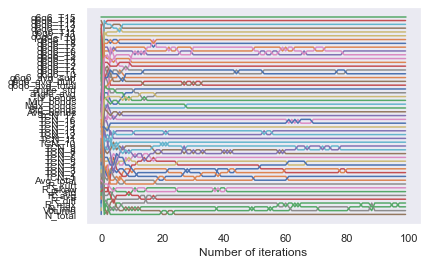

In [55]:
a = np.array(a)
# print(a)
b = [i for i in range(100)]
for i in range(53):
    plt.plot(b, a[:,i])
plt.yticks([i for i in range(1,54)], feature_names, fontsize=10)
plt.xlabel("Number of iterations")
plt.grid(b=None)

# plt.savefig('./Gold/{}_training_interation_converge.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

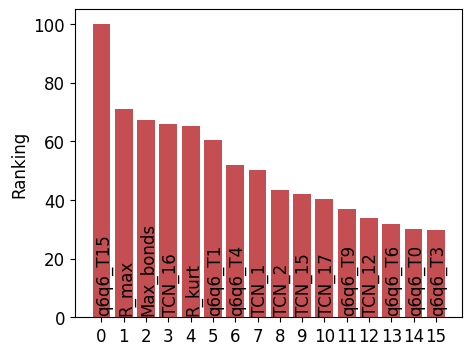

In [41]:
plt.style.use('default')

fig_FI_Weight_unimportant = plot_feature_importance_reverse(feature_names, weights_scaled, 15)
fig_FI_Weight_unimportant.savefig('./New_figures/MPL/{}_hist_TV_only.png'.format(name_prefix), dpi = 300, bbox_inches='tight')


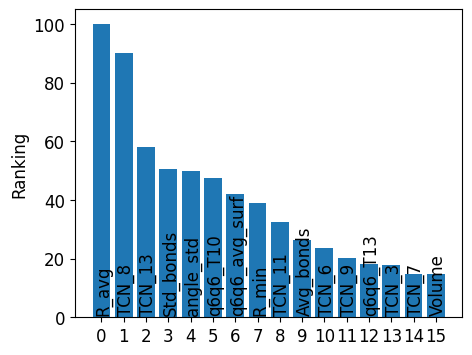

In [42]:
fig_FI_VT = plot_feature_importance(feature_names, np.abs((weights_mean)/(weights_std*weights_scaled)), 15)
fig_FI_VT.savefig('./New_figures/MPL/{}_hist_VT.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [18]:
# Benchmark
# Evaluate the model on the test data using `evaluate`
base_model = tf.keras.models.load_model('./Gold/base_model_MPL_no_scaling.h5')

base_model.trainable = False
print("Evaluate on test data")
results = base_model.evaluate(X_train, y_train, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data


2022-01-20 23:45:41.065687: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


320/320 [==============================] - 0s 517us/step - loss: 0.0020 - mae: 0.0291
test loss, test acc: [0.0020396248437464237, 0.029144328087568283]


In [19]:
# Baseline
array_aux = np.zeros(np.shape(X_train))
results = base_model.evaluate(array_aux, y_train, batch_size=10)

320/320 [==============================] - 0s 471us/step - loss: 1.0045 - mae: 0.7111


In [20]:
# Individula contribution
single_contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.zeros(np.shape(X_train))
    array_aux[:, i] = X_train[:, i]
    results = base_model.evaluate(array_aux, y_train, batch_size=10)
    
    aux_array.append(results[0])
    aux_array.append(results[1])
    single_contribution_set.append(aux_array)

320/320 [==============================] - 0s 455us/step - loss: 1.0053 - mae: 0.7108


In [21]:
# All contribution
# Set each feature to be 0 and calculate the drop of change as its contribution
# it is different from permutation method, providing permutation method results
contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.ones(np.shape(X_train))
    array_aux[:,i] = 0
    X_new = array_aux * X_train
    results_new = base_model.evaluate(X_new, y_train, batch_size=10)
    aux_array.append(results_new[0])
    aux_array.append(results_new[1])
    contribution_set.append(aux_array)

320/320 [==============================] - 0s 442us/step - loss: 0.0020 - mae: 0.0294


In [37]:
# Individual contribution of each single feature
# Compare this with permutation method
# Can be used to calculate feature interaction
contribution_set = np.round(contribution_set, 4)
for i in range(len(contribution_set)):
    contribution_set[i] = abs(contribution_set[i][0]-0.0213)
contribution_set

array([[3.420e-02, 3.420e-02],
       [7.200e-03, 7.200e-03],
       [2.820e-02, 2.820e-02],
       [5.270e-02, 5.270e-02],
       [2.300e-03, 2.300e-03],
       [1.663e-01, 1.663e-01],
       [9.800e-03, 9.800e-03],
       [1.000e-04, 1.000e-04],
       [9.000e-04, 9.000e-04],
       [2.920e-02, 2.920e-02],
       [1.000e-04, 1.000e-04],
       [1.000e-04, 1.000e-04],
       [0.000e+00, 0.000e+00],
       [1.000e-04, 1.000e-04],
       [2.700e-03, 2.700e-03],
       [6.100e-03, 6.100e-03],
       [4.200e-02, 4.200e-02],
       [3.270e-02, 3.270e-02],
       [5.386e-01, 5.386e-01],
       [2.900e-03, 2.900e-03],
       [3.910e-01, 3.910e-01],
       [1.120e-02, 1.120e-02],
       [2.360e-02, 2.360e-02],
       [5.100e-03, 5.100e-03],
       [0.000e+00, 0.000e+00],
       [1.000e-04, 1.000e-04],
       [0.000e+00, 0.000e+00],
       [6.000e-03, 6.000e-03],
       [2.000e-04, 2.000e-04],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [4.240e-02, 4.240e-02],
       [

In [38]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(len(X_train[-1])):
        array_aux = np.ones(np.shape(X_train))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X_train
        results_new = base_model.evaluate(X_new, y_train, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change to banchmark
        con = abs(0.0213-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        print(con, weight)

        weights_output[j][i] = con/con_feature

#     break

320/320 [==============================] - 0s 542us/step - loss: 0.0233 - mae: 0.1030
0.002025109854340554 -0.12752604
320/320 [==============================] - 0s 450us/step - loss: 0.0220 - mae: 0.0998
0.0007187194645404821 0.17867155
320/320 [==============================] - 0s 494us/step - loss: 0.0320 - mae: 0.1235
0.01071531246304512 0.5786033
320/320 [==============================] - 0s 457us/step - loss: 0.0211 - mae: 0.0975
0.0001537193089723582 0.027193688
320/320 [==============================] - 0s 519us/step - loss: 0.0255 - mae: 0.1087
0.0041632327705621724 1.2735693
320/320 [==============================] - 0s 516us/step - loss: 0.0617 - mae: 0.1859
0.040421649020910264 0.46753156
320/320 [==============================] - 0s 459us/step - loss: 0.0229 - mae: 0.1036
0.0016150410741567617 0.35810435
320/320 [==============================] - 0s 470us/step - loss: 0.0217 - mae: 0.0988
0.0003502100229263311 -0.7048796
320/320 [==============================] - 0s 485us/

320/320 [==============================] - 0s 436us/step - loss: 0.0215 - mae: 0.0983
0.00016144583821296743 0.23190103
320/320 [==============================] - 0s 418us/step - loss: 0.0299 - mae: 0.1263
0.00859804930984974 0.923962
320/320 [==============================] - 0s 429us/step - loss: 0.0746 - mae: 0.2217
0.05326959038972855 0.7538765
320/320 [==============================] - 0s 414us/step - loss: 0.0220 - mae: 0.0995
0.0007241229981184011 -0.55818975
320/320 [==============================] - 0s 417us/step - loss: 0.0919 - mae: 0.2602
0.07061885590553284 0.93034214
320/320 [==============================] - 0s 422us/step - loss: 0.0217 - mae: 0.0983
0.0003736644506454473 0.1446054
320/320 [==============================] - 0s 424us/step - loss: 0.0301 - mae: 0.1149
0.008779176649451256 0.34213227
320/320 [==============================] - 0s 420us/step - loss: 0.0213 - mae: 0.0980
3.1097930669785057e-05 -0.012666203
320/320 [==============================] - 0s 422us/st

320/320 [==============================] - 0s 421us/step - loss: 0.0213 - mae: 0.0981
4.458720684051565e-05 0.16118228
320/320 [==============================] - 0s 429us/step - loss: 0.0213 - mae: 0.0980
3.163250982761434e-05 0.8879654
320/320 [==============================] - 0s 417us/step - loss: 0.0212 - mae: 0.0976
8.412716090679118e-05 0.7028531
320/320 [==============================] - 0s 424us/step - loss: 0.0228 - mae: 0.1004
0.0014788798511028295 0.83886844
320/320 [==============================] - 0s 420us/step - loss: 0.0209 - mae: 0.0962
0.0003888782590627665 0.270232
320/320 [==============================] - 0s 423us/step - loss: 0.0457 - mae: 0.1495
0.024351361346244813 0.7389479
320/320 [==============================] - 0s 425us/step - loss: 0.0491 - mae: 0.1557
0.027762877893447876 0.91134375
320/320 [==============================] - 0s 421us/step - loss: 0.3825 - mae: 0.4266
0.36119483704566957 0.81536055
320/320 [==============================] - 0s 416us/step 

320/320 [==============================] - 0s 420us/step - loss: 0.0212 - mae: 0.0977
0.00010394011735916087 -0.053137857
320/320 [==============================] - 0s 422us/step - loss: 0.0247 - mae: 0.1055
0.0033816165745258336 0.41976386
320/320 [==============================] - 0s 420us/step - loss: 0.0239 - mae: 0.1038
0.0025821338862180715 0.95202625
320/320 [==============================] - 0s 422us/step - loss: 0.2362 - mae: 0.3230
0.21490037734508516 0.79149115
320/320 [==============================] - 0s 417us/step - loss: 0.0218 - mae: 0.0992
0.000501676601171494 0.0969565
320/320 [==============================] - 0s 423us/step - loss: 0.0219 - mae: 0.0993
0.0006048634171485906 -0.16848935
320/320 [==============================] - 0s 421us/step - loss: 0.0241 - mae: 0.1039
0.002818302389979363 0.27066013
320/320 [==============================] - 0s 417us/step - loss: 0.1998 - mae: 0.2882
0.17850341196060182 0.8938039
320/320 [==============================] - 0s 425us/

320/320 [==============================] - 0s 436us/step - loss: 0.0212 - mae: 0.0978
6.470349729061076e-05 0.016183816
320/320 [==============================] - 0s 415us/step - loss: 0.0225 - mae: 0.0997
0.0011707182496786123 -0.91766864
320/320 [==============================] - 0s 414us/step - loss: 0.0213 - mae: 0.0977
4.3076324462890114e-05 1.1044308
320/320 [==============================] - 0s 420us/step - loss: 0.0214 - mae: 0.0981
5.189622640609792e-05 -0.47726706
320/320 [==============================] - 0s 425us/step - loss: 0.0214 - mae: 0.0981
6.676385998725942e-05 -0.15923354
320/320 [==============================] - 0s 421us/step - loss: 0.0271 - mae: 0.1175
0.005806994763016701 0.983517
320/320 [==============================] - 0s 420us/step - loss: 0.0216 - mae: 0.0992
0.0003362755745649343 1.4894763
320/320 [==============================] - 0s 416us/step - loss: 0.0213 - mae: 0.0981
4.501934051513723e-05 -2.8592389
320/320 [==============================] - 0s 41

320/320 [==============================] - 0s 426us/step - loss: 0.0221 - mae: 0.1000
0.0008200175583362584 0.20072961
320/320 [==============================] - 0s 428us/step - loss: 0.0323 - mae: 0.1241
0.010979312610626221 0.58686715
320/320 [==============================] - 0s 425us/step - loss: 0.0210 - mae: 0.0973
0.000283804583549499 0.07596754
320/320 [==============================] - 0s 430us/step - loss: 0.0250 - mae: 0.1074
0.0036958485364913946 1.2113341
320/320 [==============================] - 0s 429us/step - loss: 0.0718 - mae: 0.2026
0.05046279276609421 0.5281658
320/320 [==============================] - 0s 426us/step - loss: 0.0231 - mae: 0.1042
0.0017726711452007299 0.37902734
320/320 [==============================] - 0s 431us/step - loss: 0.0217 - mae: 0.0988
0.0003538030654191976 -0.7115075
320/320 [==============================] - 0s 427us/step - loss: 0.0213 - mae: 0.0981
1.5917372703552757e-05 0.15140389
320/320 [==============================] - 0s 421us/s

320/320 [==============================] - 0s 438us/step - loss: 0.0303 - mae: 0.1276
0.009000259590148926 0.94515103
320/320 [==============================] - 0s 483us/step - loss: 0.0757 - mae: 0.2235
0.054357397508621216 0.7615817
320/320 [==============================] - 0s 449us/step - loss: 0.0219 - mae: 0.0992
0.0006292230904102331 -0.517757
320/320 [==============================] - 0s 429us/step - loss: 0.0919 - mae: 0.2601
0.07057371283769608 0.9300418
320/320 [==============================] - 0s 512us/step - loss: 0.0216 - mae: 0.0981
0.0002969607234001165 0.13530216
320/320 [==============================] - 0s 441us/step - loss: 0.0293 - mae: 0.1137
0.007990419071912766 0.32815468
320/320 [==============================] - 0s 493us/step - loss: 0.0213 - mae: 0.0980
2.602781057357839e-05 -0.01700181
320/320 [==============================] - 0s 531us/step - loss: 0.0260 - mae: 0.1104
0.00471095661520958 0.52733546
320/320 [==============================] - 0s 428us/step 

320/320 [==============================] - 0s 437us/step - loss: 0.0213 - mae: 0.0980
3.15580040216451e-05 0.87022454
320/320 [==============================] - 0s 421us/step - loss: 0.0212 - mae: 0.0976
9.180684685707041e-05 0.7614119
320/320 [==============================] - 0s 433us/step - loss: 0.0227 - mae: 0.1002
0.0014120872586965566 0.8286061
320/320 [==============================] - 0s 421us/step - loss: 0.0209 - mae: 0.0962
0.0003673535317182536 0.2858795
320/320 [==============================] - 0s 424us/step - loss: 0.0435 - mae: 0.1457
0.022214519929885865 0.7015478
320/320 [==============================] - 0s 418us/step - loss: 0.0473 - mae: 0.1528
0.026048853200674058 0.87906986
320/320 [==============================] - 0s 430us/step - loss: 0.3627 - mae: 0.4154
0.3414375066280365 0.79220885
320/320 [==============================] - 0s 425us/step - loss: 0.0234 - mae: 0.1040
0.0021215408563613897 0.80354524
320/320 [==============================] - 0s 430us/step -

320/320 [==============================] - 0s 428us/step - loss: 0.0247 - mae: 0.1055
0.0033885679662227636 0.42007425
320/320 [==============================] - 0s 424us/step - loss: 0.0240 - mae: 0.1041
0.002680813100934029 0.9641208
320/320 [==============================] - 0s 438us/step - loss: 0.2282 - mae: 0.3176
0.2068957268714905 0.7769522
320/320 [==============================] - 0s 431us/step - loss: 0.0220 - mae: 0.0998
0.0007166612416505819 0.13333894
320/320 [==============================] - 0s 418us/step - loss: 0.0220 - mae: 0.0994
0.0006776108860969549 -0.1859929
320/320 [==============================] - 0s 426us/step - loss: 0.0246 - mae: 0.1050
0.003323792618513108 0.30173853
320/320 [==============================] - 0s 429us/step - loss: 0.2043 - mae: 0.2915
0.1829505443096161 0.9052695
320/320 [==============================] - 0s 444us/step - loss: 0.0522 - mae: 0.1246
0.030901975136995316 0.9560874
320/320 [==============================] - 0s 434us/step - lo

320/320 [==============================] - 0s 469us/step - loss: 0.0228 - mae: 0.1005
0.0015075813502073293 -0.99316067
320/320 [==============================] - 0s 512us/step - loss: 0.0213 - mae: 0.0978
3.751632869243571e-05 1.0101737
320/320 [==============================] - 0s 425us/step - loss: 0.0214 - mae: 0.0981
5.104872286319784e-05 -0.43210658
320/320 [==============================] - 0s 434us/step - loss: 0.0214 - mae: 0.0981
6.377990245819143e-05 -0.13730304
320/320 [==============================] - 0s 510us/step - loss: 0.0269 - mae: 0.1168
0.005588726279139519 0.96358734
320/320 [==============================] - 0s 461us/step - loss: 0.0216 - mae: 0.0992
0.00033686230778694204 1.4909179
320/320 [==============================] - 0s 424us/step - loss: 0.0213 - mae: 0.0981
4.499512612819723e-05 -2.920712
320/320 [==============================] - 0s 427us/step - loss: 0.0213 - mae: 0.0981
2.8577771782875572e-05 0.4832051
320/320 [==============================] - 0s 42

320/320 [==============================] - 0s 573us/step - loss: 0.0321 - mae: 0.1237
0.010805892896652222 0.58145
320/320 [==============================] - 0s 482us/step - loss: 0.0210 - mae: 0.0973
0.0002534918963909144 0.050852694
320/320 [==============================] - 0s 439us/step - loss: 0.0252 - mae: 0.1079
0.003859019976854325 1.2334796
320/320 [==============================] - 0s 434us/step - loss: 0.0683 - mae: 0.1970
0.0470203786611557 0.50811565
320/320 [==============================] - 0s 462us/step - loss: 0.0228 - mae: 0.1034
0.0015294301778078084 0.34631544
320/320 [==============================] - 0s 581us/step - loss: 0.0216 - mae: 0.0988
0.0003484125703573232 -0.7015825
320/320 [==============================] - 0s 501us/step - loss: 0.0213 - mae: 0.0981
1.73460215330129e-05 0.120998785
320/320 [==============================] - 0s 650us/step - loss: 0.0371 - mae: 0.1462
0.015777799439430237 0.7549498
320/320 [==============================] - 0s 483us/step -

320/320 [==============================] - 0s 478us/step - loss: 0.0726 - mae: 0.2183
0.051256741535663605 0.73940873
320/320 [==============================] - 0s 490us/step - loss: 0.0221 - mae: 0.0997
0.0008161618828773504 -0.59477377
320/320 [==============================] - 0s 453us/step - loss: 0.0921 - mae: 0.2605
0.07080829436779022 0.93160117
320/320 [==============================] - 0s 442us/step - loss: 0.0216 - mae: 0.0981
0.00027172374427318624 0.13202074
320/320 [==============================] - 0s 439us/step - loss: 0.0279 - mae: 0.1114
0.0065940424323081975 0.3016148
320/320 [==============================] - 0s 436us/step - loss: 0.0214 - mae: 0.0981
5.31944900751119e-05 0.0055990503
320/320 [==============================] - 0s 426us/step - loss: 0.0255 - mae: 0.1091
0.0041868548363447194 0.48806632
320/320 [==============================] - 0s 425us/step - loss: 0.0221 - mae: 0.1003
0.0008327058970928197 0.22471717
320/320 [==============================] - 0s 448

320/320 [==============================] - 0s 439us/step - loss: 0.0212 - mae: 0.0976
8.890670835971781e-05 0.738838
320/320 [==============================] - 0s 458us/step - loss: 0.0228 - mae: 0.1004
0.0014597262710332876 0.83594376
320/320 [==============================] - 0s 447us/step - loss: 0.0209 - mae: 0.0962
0.0003562484413385386 0.2927779
320/320 [==============================] - 0s 454us/step - loss: 0.0436 - mae: 0.1459
0.022321081858873368 0.70345354
320/320 [==============================] - 0s 443us/step - loss: 0.0484 - mae: 0.1546
0.027101355743408204 0.89900744
320/320 [==============================] - 0s 417us/step - loss: 0.3876 - mae: 0.4295
0.3662927031040192 0.821231
320/320 [==============================] - 0s 442us/step - loss: 0.0238 - mae: 0.1050
0.002490229111909867 0.90092164
320/320 [==============================] - 0s 638us/step - loss: 0.1375 - mae: 0.2245
0.11621286268234253 0.5330766
320/320 [==============================] - 0s 427us/step - los

320/320 [==============================] - 0s 501us/step - loss: 0.0239 - mae: 0.1038
0.002581517350673676 0.95195
320/320 [==============================] - 0s 424us/step - loss: 0.2349 - mae: 0.3221
0.21358773405551912 0.7891256
320/320 [==============================] - 0s 413us/step - loss: 0.0220 - mae: 0.0998
0.0007393426716327672 0.13695425
320/320 [==============================] - 0s 558us/step - loss: 0.0219 - mae: 0.0993
0.0006440404325723653 -0.17799608
320/320 [==============================] - 0s 476us/step - loss: 0.0249 - mae: 0.1056
0.0036278135597705846 0.31937486
320/320 [==============================] - 0s 562us/step - loss: 0.2084 - mae: 0.2945
0.18711687917709352 0.91588515
320/320 [==============================] - 0s 482us/step - loss: 0.0509 - mae: 0.1236
0.029567807120084763 0.9363274
320/320 [==============================] - 0s 521us/step - loss: 0.0213 - mae: 0.0979
6.445544958114113e-06 0.56726587
320/320 [==============================] - 0s 601us/step -

320/320 [==============================] - 0s 438us/step - loss: 0.0213 - mae: 0.0978
3.785719275474497e-05 1.015866
320/320 [==============================] - 0s 579us/step - loss: 0.0214 - mae: 0.0981
5.153487324714712e-05 -0.45837134
320/320 [==============================] - 0s 431us/step - loss: 0.0214 - mae: 0.0981
6.337198317050985e-05 -0.13421813
320/320 [==============================] - 0s 511us/step - loss: 0.0269 - mae: 0.1168
0.005594057169556618 0.9640786
320/320 [==============================] - 0s 581us/step - loss: 0.0217 - mae: 0.0993
0.00037280763387680105 1.5761948
320/320 [==============================] - 0s 513us/step - loss: 0.0213 - mae: 0.0981
4.507708251476339e-05 -2.722674
320/320 [==============================] - 0s 579us/step - loss: 0.0213 - mae: 0.0981
2.9825744032860313e-05 0.42570773
320/320 [==============================] - 0s 500us/step - loss: 0.0229 - mae: 0.1019
0.0015567887097597127 0.11923123
320/320 [==============================] - 0s 502u

320/320 [==============================] - 0s 496us/step - loss: 0.0211 - mae: 0.0973
0.00022171330749988505 0.041347135
320/320 [==============================] - 0s 422us/step - loss: 0.0254 - mae: 0.1085
0.004072618809342385 1.2617836
320/320 [==============================] - 0s 410us/step - loss: 0.0639 - mae: 0.1896
0.04256640667915344 0.48105997
320/320 [==============================] - 0s 422us/step - loss: 0.0232 - mae: 0.1044
0.0018578350067138677 0.3899458
320/320 [==============================] - 0s 528us/step - loss: 0.0217 - mae: 0.0989
0.0003595269739627843 -0.7220106
320/320 [==============================] - 0s 415us/step - loss: 0.0213 - mae: 0.0981
1.5915510058403526e-05 0.15752234
320/320 [==============================] - 0s 430us/step - loss: 0.0367 - mae: 0.1455
0.015432669919729233 0.747474
320/320 [==============================] - 0s 414us/step - loss: 0.0214 - mae: 0.0981
5.206200182437948e-05 -0.15118264
320/320 [==============================] - 0s 431us/

320/320 [==============================] - 0s 529us/step - loss: 0.0219 - mae: 0.0990
0.0005592938035726552 -0.48580754
320/320 [==============================] - 0s 524us/step - loss: 0.0924 - mae: 0.2608
0.07105873818397522 0.9332632
320/320 [==============================] - 0s 425us/step - loss: 0.0222 - mae: 0.0999
0.000946874868869782 0.19687232
320/320 [==============================] - 0s 469us/step - loss: 0.0289 - mae: 0.1131
0.007627689418196679 0.32149774
320/320 [==============================] - 0s 621us/step - loss: 0.0214 - mae: 0.0983
0.00013044024705886892 0.063473284
320/320 [==============================] - 0s 471us/step - loss: 0.0258 - mae: 0.1098
0.004497374546527863 0.5115882
320/320 [==============================] - 0s 459us/step - loss: 0.0220 - mae: 0.0999
0.000694959563016892 0.1919976
320/320 [==============================] - 0s 595us/step - loss: 0.0209 - mae: 0.0968
0.0004019707918167109 0.18161489
320/320 [==============================] - 0s 509us/st

320/320 [==============================] - 0s 414us/step - loss: 0.0229 - mae: 0.1008
0.0016440182447433477 0.8634846
320/320 [==============================] - 0s 409us/step - loss: 0.0210 - mae: 0.0963
0.00030962084531784007 0.31687626
320/320 [==============================] - 0s 446us/step - loss: 0.0435 - mae: 0.1457
0.022212508273124695 0.70151144
320/320 [==============================] - 0s 427us/step - loss: 0.0481 - mae: 0.1541
0.0268085404753685 0.8934993
320/320 [==============================] - 0s 426us/step - loss: 0.3731 - mae: 0.4213
0.3517834722518921 0.80441344
320/320 [==============================] - 0s 424us/step - loss: 0.0236 - mae: 0.1046
0.002344030094146729 0.8631006
320/320 [==============================] - 0s 420us/step - loss: 0.1430 - mae: 0.2285
0.12173083717823029 0.54620314
320/320 [==============================] - 0s 428us/step - loss: 0.0215 - mae: 0.0984
0.00016288007497787527 -0.019964034
320/320 [==============================] - 0s 427us/step 

320/320 [==============================] - 0s 461us/step - loss: 0.2345 - mae: 0.3218
0.2131702482223511 0.7883719
320/320 [==============================] - 0s 491us/step - loss: 0.0219 - mae: 0.0995
0.0006197291880846029 0.11743666
320/320 [==============================] - 0s 416us/step - loss: 0.0218 - mae: 0.0990
0.0004997413128614431 -0.1419168
320/320 [==============================] - 0s 434us/step - loss: 0.0250 - mae: 0.1058
0.0037332858413457876 0.32533047
320/320 [==============================] - 0s 428us/step - loss: 0.2043 - mae: 0.2915
0.1830196111917496 0.90544623
320/320 [==============================] - 0s 458us/step - loss: 0.0514 - mae: 0.1240
0.030138797265291214 0.94483757
320/320 [==============================] - 0s 455us/step - loss: 0.0213 - mae: 0.0979
6.6094577312464375e-06 0.5649294
320/320 [==============================] - 0s 409us/step - loss: 0.0236 - mae: 0.1037
0.002288947951793671 -0.13969713
320/320 [==============================] - 0s 409us/step

320/320 [==============================] - 0s 435us/step - loss: 0.0214 - mae: 0.0981
5.162055492401174e-05 -0.46286553
320/320 [==============================] - 0s 470us/step - loss: 0.0214 - mae: 0.0981
6.241644620895437e-05 -0.1271106
320/320 [==============================] - 0s 470us/step - loss: 0.0269 - mae: 0.1168
0.005582501319050789 0.9630118
320/320 [==============================] - 0s 449us/step - loss: 0.0217 - mae: 0.0993
0.00036744694113731435 1.5637922
320/320 [==============================] - 0s 418us/step - loss: 0.0213 - mae: 0.0981
4.506031870842031e-05 -2.778694
320/320 [==============================] - 0s 431us/step - loss: 0.0213 - mae: 0.0981
2.9496055841446434e-05 0.44031605
320/320 [==============================] - 0s 429us/step - loss: 0.0228 - mae: 0.1018
0.0015287354111671453 0.117545255
320/320 [==============================] - 0s 580us/step - loss: 0.0215 - mae: 0.0983
0.00017791348397731832 0.25759193
320/320 [==============================] - 0s 4

320/320 [==============================] - 0s 442us/step - loss: 0.0252 - mae: 0.1079
0.003854085829854012 1.2328172
320/320 [==============================] - 0s 672us/step - loss: 0.0721 - mae: 0.2031
0.05079410518407822 0.5300593
320/320 [==============================] - 0s 449us/step - loss: 0.0231 - mae: 0.1042
0.0017874102562665944 0.38093588
320/320 [==============================] - 0s 443us/step - loss: 0.0217 - mae: 0.0989
0.00036043780744075826 -0.723669
320/320 [==============================] - 0s 578us/step - loss: 0.0213 - mae: 0.0981
1.590433418750814e-05 0.15481052
320/320 [==============================] - 0s 831us/step - loss: 0.0367 - mae: 0.1453
0.015372689020633698 0.7461665
320/320 [==============================] - 0s 543us/step - loss: 0.0214 - mae: 0.0981
5.302126407623342e-05 -0.16989969
320/320 [==============================] - 0s 876us/step - loss: 0.0213 - mae: 0.0981
4.4544366002083335e-05 0.15620555
320/320 [==============================] - 0s 705us/s

320/320 [==============================] - 0s 445us/step - loss: 0.0879 - mae: 0.2539
0.06655012364387512 0.902875
320/320 [==============================] - 0s 436us/step - loss: 0.0216 - mae: 0.0980
0.000261181172728539 0.13061073
320/320 [==============================] - 0s 426us/step - loss: 0.0267 - mae: 0.1092
0.005357961308956147 0.27568668
320/320 [==============================] - 0s 422us/step - loss: 0.0213 - mae: 0.0980
1.0193464159966026e-05 -0.030862864
320/320 [==============================] - 0s 497us/step - loss: 0.0253 - mae: 0.1085
0.0039709500491619115 0.47123668
320/320 [==============================] - 0s 424us/step - loss: 0.0220 - mae: 0.1000
0.0007470093190670019 0.20458227
320/320 [==============================] - 0s 468us/step - loss: 0.0209 - mae: 0.0967
0.0004086595505475993 0.2192275
320/320 [==============================] - 0s 419us/step - loss: 0.0213 - mae: 0.0980
1.1515942215920005e-05 -0.011290492
320/320 [==============================] - 0s 682

320/320 [==============================] - 0s 423us/step - loss: 0.0209 - mae: 0.0962
0.00039105941653251597 0.2684098
320/320 [==============================] - 0s 427us/step - loss: 0.0444 - mae: 0.1473
0.02311172257065773 0.71745795
320/320 [==============================] - 0s 418us/step - loss: 0.0483 - mae: 0.1545
0.02703851382136345 0.8978275
320/320 [==============================] - 0s 423us/step - loss: 0.3772 - mae: 0.4236
0.35586144323349 0.8091747
320/320 [==============================] - 0s 438us/step - loss: 0.0236 - mae: 0.1046
0.002347909983992577 0.86412305
320/320 [==============================] - 0s 421us/step - loss: 0.1369 - mae: 0.2241
0.11562766427993774 0.53166634
320/320 [==============================] - 0s 456us/step - loss: 0.0213 - mae: 0.0980
3.406884968280843e-05 0.0022374562
320/320 [==============================] - 0s 467us/step - loss: 0.0211 - mae: 0.0974
0.00019936715364456126 0.040152714
320/320 [==============================] - 0s 422us/step -

320/320 [==============================] - 0s 636us/step - loss: 0.0218 - mae: 0.0992
0.0004958204448223119 0.09590554
320/320 [==============================] - 0s 571us/step - loss: 0.0219 - mae: 0.0992
0.00059098671078682 -0.16507183
320/320 [==============================] - 0s 573us/step - loss: 0.0245 - mae: 0.1048
0.0032336871594190603 0.29636738
320/320 [==============================] - 0s 616us/step - loss: 0.2042 - mae: 0.2914
0.182858291220665 0.905033
320/320 [==============================] - 0s 597us/step - loss: 0.0518 - mae: 0.1243
0.030467446100711823 0.9496991
320/320 [==============================] - 0s 572us/step - loss: 0.0213 - mae: 0.0979
7.209229469298806e-06 0.5552022
320/320 [==============================] - 0s 563us/step - loss: 0.0244 - mae: 0.1058
0.0031429111480712896 -0.1755847
320/320 [==============================] - 0s 575us/step - loss: 0.0218 - mae: 0.0993
0.0005396596610546117 0.13732566
320/320 [==============================] - 0s 673us/step -

320/320 [==============================] - 0s 549us/step - loss: 0.0214 - mae: 0.0981
6.28578931093221e-05 -0.13046502
320/320 [==============================] - 0s 556us/step - loss: 0.0271 - mae: 0.1175
0.005826917615532876 0.9853154
320/320 [==============================] - 0s 540us/step - loss: 0.0216 - mae: 0.0990
0.0003021779924631124 1.4034222
320/320 [==============================] - 0s 567us/step - loss: 0.0213 - mae: 0.0981
4.507708251476339e-05 -2.7233725
320/320 [==============================] - 0s 538us/step - loss: 0.0213 - mae: 0.0981
2.91570544242864e-05 0.45541033
320/320 [==============================] - 0s 546us/step - loss: 0.0236 - mae: 0.1038
0.002326077920198441 0.16167785
320/320 [==============================] - 0s 540us/step - loss: 0.0215 - mae: 0.0984
0.00020790393352508596 0.30165786
320/320 [==============================] - 0s 539us/step - loss: 0.0300 - mae: 0.1267
0.008740016397833825 0.9314954
320/320 [==============================] - 0s 552us/st

320/320 [==============================] - 0s 873us/step - loss: 0.0653 - mae: 0.1921
0.0440451532125473 0.49019182
320/320 [==============================] - 0s 886us/step - loss: 0.0231 - mae: 0.1044
0.001842335936427117 0.3879774
320/320 [==============================] - 0s 688us/step - loss: 0.0217 - mae: 0.0989
0.00039418521225452474 -0.7842209
320/320 [==============================] - 0s 970us/step - loss: 0.0213 - mae: 0.0981
1.5939724445343528e-05 0.1594962
320/320 [==============================] - 0s 581us/step - loss: 0.0365 - mae: 0.1450
0.015237449806928635 0.74320877
320/320 [==============================] - 0s 589us/step - loss: 0.0214 - mae: 0.0981
5.245129466056875e-05 -0.15885212
320/320 [==============================] - 0s 635us/step - loss: 0.0213 - mae: 0.0981
4.4754844903946434e-05 0.17497686
320/320 [==============================] - 0s 685us/step - loss: 0.0213 - mae: 0.0980
3.162692189216665e-05 0.884795
320/320 [==============================] - 0s 709us/s

320/320 [==============================] - 0s 642us/step - loss: 0.0214 - mae: 0.0977
0.00014613489508628896 0.113323234
320/320 [==============================] - 0s 646us/step - loss: 0.0289 - mae: 0.1131
0.007639330950379372 0.3217137
320/320 [==============================] - 0s 619us/step - loss: 0.0214 - mae: 0.0981
5.27493178844457e-05 0.005241772
320/320 [==============================] - 0s 621us/step - loss: 0.0257 - mae: 0.1096
0.004390820068120957 0.5036037
320/320 [==============================] - 0s 611us/step - loss: 0.0220 - mae: 0.0998
0.0006732578843832021 0.1866635
320/320 [==============================] - 0s 656us/step - loss: 0.0209 - mae: 0.0968
0.00040848818719387003 0.19789617
320/320 [==============================] - 0s 620us/step - loss: 0.0213 - mae: 0.0979
3.988002538680979e-05 -0.028981712
320/320 [==============================] - 0s 838us/step - loss: 0.0249 - mae: 0.1060
0.003592983958125115 0.4290624
320/320 [==============================] - 0s 701u

320/320 [==============================] - 0s 592us/step - loss: 0.0455 - mae: 0.1492
0.024150720936059952 0.7355071
320/320 [==============================] - 0s 525us/step - loss: 0.0494 - mae: 0.1562
0.028050470304489136 0.91666216
320/320 [==============================] - 0s 514us/step - loss: 0.3796 - mae: 0.4250
0.3582738518238068 0.8119785
320/320 [==============================] - 0s 649us/step - loss: 0.0238 - mae: 0.1050
0.002502077397704125 0.90394366
320/320 [==============================] - 0s 540us/step - loss: 0.1372 - mae: 0.2243
0.11590689713954926 0.5323397
320/320 [==============================] - 0s 532us/step - loss: 0.0213 - mae: 0.0980
5.849775671959434e-06 0.0075168437
320/320 [==============================] - 0s 533us/step - loss: 0.0210 - mae: 0.0972
0.00026788641810417124 0.05574373
320/320 [==============================] - 0s 562us/step - loss: 0.0222 - mae: 0.0991
0.0009278311848640447 -0.85723966
320/320 [==============================] - 0s 528us/ste

320/320 [==============================] - 0s 730us/step - loss: 0.0218 - mae: 0.0990
0.00048146131336689046 -0.13712473
320/320 [==============================] - 0s 624us/step - loss: 0.0239 - mae: 0.1034
0.002560070854425431 0.25379056
320/320 [==============================] - 0s 656us/step - loss: 0.1992 - mae: 0.2877
0.17785853440761568 0.89212936
320/320 [==============================] - 0s 745us/step - loss: 0.0519 - mae: 0.1244
0.03061679298877716 0.95190006
320/320 [==============================] - 0s 677us/step - loss: 0.0213 - mae: 0.0979
5.937042832374062e-06 0.57460725
320/320 [==============================] - 0s 622us/step - loss: 0.0254 - mae: 0.1080
0.004056104597449303 -0.20956266
320/320 [==============================] - 0s 495us/step - loss: 0.0218 - mae: 0.0992
0.0004961650341749196 0.12675731
320/320 [==============================] - 0s 552us/step - loss: 0.0326 - mae: 0.1249
0.011304027539491654 0.59689885
320/320 [==============================] - 0s 498us/

320/320 [==============================] - 0s 535us/step - loss: 0.0269 - mae: 0.1168
0.00559243108034134 0.96392834
320/320 [==============================] - 0s 488us/step - loss: 0.0216 - mae: 0.0992
0.00034601348340511373 1.5130843
320/320 [==============================] - 0s 647us/step - loss: 0.0213 - mae: 0.0981
4.507335722446493e-05 -2.7251277
320/320 [==============================] - 0s 545us/step - loss: 0.0213 - mae: 0.0981
3.044041693210653e-05 0.40098006
320/320 [==============================] - 0s 532us/step - loss: 0.0228 - mae: 0.1018
0.001538983684778214 0.1181613
320/320 [==============================] - 0s 538us/step - loss: 0.0214 - mae: 0.0982
0.0001354209601879125 0.18870135
320/320 [==============================] - 0s 539us/step - loss: 0.0300 - mae: 0.1265
0.008665465888381005 0.9275476
320/320 [==============================] - 0s 704us/step - loss: 0.0755 - mae: 0.2233
0.0541987969994545 0.760463
320/320 [==============================] - 0s 520us/step - 

320/320 [==============================] - 0s 498us/step - loss: 0.0229 - mae: 0.1035
0.001576920178532601 0.35289523
320/320 [==============================] - 0s 490us/step - loss: 0.0217 - mae: 0.0989
0.00038022096157074026 -0.7594251
320/320 [==============================] - 0s 582us/step - loss: 0.0213 - mae: 0.0981
1.6988393664360557e-05 0.12543201
320/320 [==============================] - 0s 504us/step - loss: 0.0368 - mae: 0.1455
0.015467970770597458 0.7482426
320/320 [==============================] - 0s 625us/step - loss: 0.0214 - mae: 0.0981
5.2795884013176475e-05 -0.1656158
320/320 [==============================] - 0s 530us/step - loss: 0.0213 - mae: 0.0981
4.4738081097603355e-05 0.1729237
320/320 [==============================] - 0s 497us/step - loss: 0.0213 - mae: 0.0980
3.159339427948049e-05 0.87751055
320/320 [==============================] - 0s 698us/step - loss: 0.0212 - mae: 0.0976
9.047319293022105e-05 0.75098044
320/320 [==============================] - 0s 53

In [84]:
weights_output = np.insert(weights_output, 0, np.ones(35), 0)

In [87]:
weights_output = np.nan_to_num(weights_output)
pl, weights_contribution = lu(weights_output, permute_l=True)

In [90]:
# weights_contribution = np.nan_to_num(weights_contribution)
solve(weights, np.ones(35))

ValueError: Input a needs to be a square matrix.

[ 278.71758589  -51.30201729  -14.01062241  519.55939789 -277.29083034
 -504.6609103   158.91483202   73.30759514    5.86506724 -658.11817681
  197.44069323  296.77327753  -49.09075633  -92.68332074  467.15963425
  799.99260072 -141.40946374 -107.91680663   -7.56560772  460.11197372
  230.26252271 -195.88073305  419.0577069   152.79302891 -211.12835136
 -204.51669508   -9.76164144 -928.24645536 -509.18630774  -23.8713769
   19.50557351 -277.20566831  -65.47642634  432.62049067  -61.36508876
  -32.06967298   44.76756047  123.77618653  -69.77566503 -142.62512992
 -291.10955685 -152.04503586 -169.57741664  242.35023214 -152.18214276
  -60.95367654   53.46877792  335.25117601 -121.79027953   74.33255472
  391.3065579  -226.70988942   33.94290859]
[-6.76090104e+01  1.63183869e+02  3.20313659e+01 -4.35212582e+01
  3.19100226e+02 -1.62394413e+01 -9.97806969e+01 -4.49296450e+01
 -1.19713533e+01 -4.80219555e+00  3.81653129e+01  9.86635242e+01
  7.71866544e+00  5.17137091e+01 -1.17065806e+02 -3.

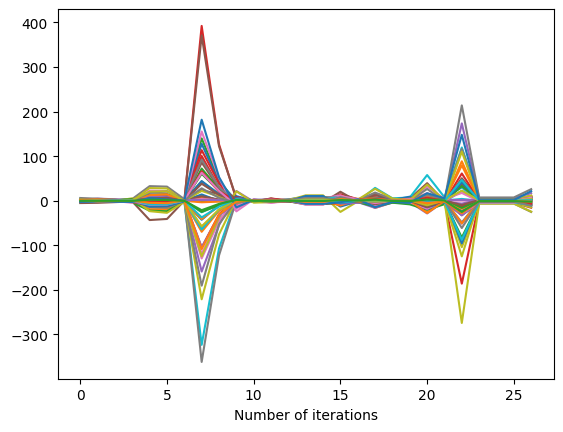

In [43]:
from scipy.linalg import lu
from scipy.linalg import solve
import matplotlib.pyplot as plt

weights = np.insert(weights, 0, np.ones(53), 0)
c = []
for i in range(53, 80):
    pl, weights_contribution = lu(weights[0:i], permute_l=True)
    weights_contribution = np.nan_to_num(weights_contribution)
#     print(weights_contribution)
    out = solve(weights_contribution, np.ones(53))
    print(out)
    out = out/out[-9]
    c.append(out)
c = np.array(c)
c_T = c.T
ran = [i for i in range(len(c_T[0]))]
for i in range(len(c_T)):
    plt.plot(ran, c_T[i])
plt.xlabel("Number of iterations")
plt.savefig('./Gold/MPL/{}_contribution_calculation_iteration.png'.format(name_prefix), dpi=300, bbox_inches='tight')


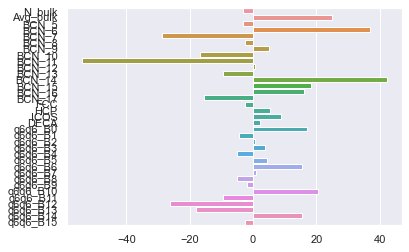

In [93]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1)

sns.barplot(c[-1], feature_names)
plt.savefig('./New_figures/{}_contribution_calculation.png'.format(name_prefix), dpi=300, bbox_inches='tight')


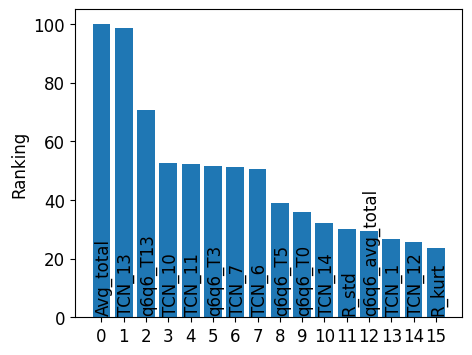

In [44]:
fig_FI_contribution_cal = plot_feature_importance(feature_names, c[-6], 15)


In [45]:
fig_FI_contribution_cal.savefig('./New_figures/MPL/{}_cc.png'.format(name_prefix), dpi=300, bbox_inches='tight')
